In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def drop_rows_gdp(table_gdp):
    return table_gdp.drop([4,5,7,8,9,10,11,12,14,15,16], axis = 0, inplace = False)

def drop_rows_price(table_price):
    return table_price.drop([1,3,4,5,6,7,10,11,12,13,14,16,17], axis = 0, inplace = False)

def diff(table):
    table['difference'] = table['Highest'] - table['Lowest']
    return table['difference']

def dist_max(table):
    table['Distance Max'] = table['Highest'] - table['Last']
    return table['Distance Max']

def gdp_1year(table):
    table['GDP in 1 Year'] = table['GDP'] * (1 + table['GDP Annual Growth Rate'])
    return table['GDP in 1 Year']

def gdp_5year(table):
    table['GDP in 5 Year'] = table['GDP'] * (1 + table['GDP Annual Growth Rate'])**5
    return table['GDP in 5 Year']

def gdp_10year(table):
    table['GDP in 10 Year'] = table['GDP'] * (1 + table['GDP Annual Growth Rate'])**10
    return table['GDP in 10 Year']

In [4]:
countries = ['united-states', 'Canada', 'Switzerland', 'Japan', 'united-kingdom', 'european-union', 'Sweden']

indicators = ['gdp', 'inflation-rate', 'consumer-price-index-cpi']

In [5]:
url = 'https://tradingeconomics.com/'

In [6]:
url_list = []

# we're going inside each country and get the indicators that we need
for country in countries:
    for ind in indicators:
        # we're appending the url's to a list so then we can loop them and get the graphs
        url_list.append("https://tradingeconomics.com/" + country + "/" + ind)

data_list = []
for x in url_list:
    # append the read url to give us a list with the tables
    data_list.append(pd.read_html(x))
                     
# data_list will give us a big list with a bunch of tables. In the next cells we will select the ones we want


In [94]:
# United States

table_us_gdp = pd.DataFrame(data_list[0][1])

table_us_price = pd.DataFrame(data_list[2][1])


table_us_gdp = drop_rows_gdp(table_us_gdp)

table_us_price = drop_rows_price(table_us_price) 

table_us_price

,United States Prices,Last,Previous,Highest,Lowest,Unit,Unnamed: 6
0,Inflation Rate,0.60,0.10,23.70,-15.80,percent,[+]
2,Consumer Price Index CPI,257.21,255.77,259.05,23.51,points,[+]
8,Export Prices,120.50,118.80,135.30,82.40,points,[+]
9,Import Prices,120.80,119.10,147.50,75.00,points,[+]
15,Inflation Expectations,2.68,3.00,3.40,2.33,percent,[+]


In [8]:
diff(table_us_gdp)
diff(table_us_price)


0      39.50
2     235.54
8      52.90
9      72.50
15      1.07
Name: difference, dtype: float64

In [9]:
Balance_overseas = table_us_price.iloc[2][1] - table_us_price.iloc[3][1]
Balance_overseas


-0.29999999999999716

In [10]:
dist_max(table_us_gdp)
dist_max(table_us_price)

0     23.10
2      1.84
8     14.80
9     26.70
15     0.72
Name: Distance Max, dtype: float64

In [78]:
GDP_1year = table_us_gdp.iloc[2][1] * (1 + (table_us_gdp.iloc[1][1]/100))
GDP_5year = table_us_gdp.iloc[2][1] * (1 + (table_us_gdp.iloc[1][1]/100))**5
GDP_10year = table_us_gdp.iloc[2][1] * (1 + (table_us_gdp.iloc[1][1]/100))**10
GDP_10year

22079.279010048584

In [75]:
table_us_gdp.set_index(table_us_gdp['United States GDP'])

,United States GDP,Last,Previous,Highest,Lowest,Unit,Unnamed: 6,difference,Distance Max
United States GDP,,,,,,,,,
GDP Growth Rate,GDP Growth Rate,-5.0,2.10,16.70,-10.00,percent,[+],26.7,21.70
GDP Annual Growth Rate,GDP Annual Growth Rate,0.3,2.30,13.40,-3.90,percent,[+],17.3,13.10
GDP,GDP,21427.7,20580.22,21427.70,543.30,USD Billion,[+],20884.4,0.00
GDP Constant Prices,GDP Constant Prices,18977.4,19221.97,19221.97,2184.87,USD Billion,[+],17037.1,244.57
GDP per capita,GDP per capita,55809.0,54795.50,55809.00,17562.60,USD,[+],38246.4,0.00
GDP From Services,GDP From Services,13083.8,13286.30,13286.30,9734.70,USD Billion,[+],3551.6,202.50


In [12]:
# Canada

table_canada_gdp = pd.DataFrame(data_list[3][1])

table_canada_price = pd.DataFrame(data_list[5][1])

table_canada_gdp = drop_rows_gdp(table_canada_gdp)

table_canada_price = table_canada_price.drop([1,3,4,5,6,7,10,11,12,13,14], axis = 0)


In [96]:
diff(table_canada_gdp)
diff(table_canada_price)
table_canada_price

,Canada Prices,Last,Previous,Highest,Lowest,Unit,Unnamed: 6,difference,Distance Max
0,Inflation Rate,-0.4,-0.2,21.6,-17.8,percent,[+],39.4,22.0
2,Consumer Price Index CPI,136.1,135.7,137.4,12.1,points,[+],125.3,1.3
8,Export Prices,103.9,102.2,113.5,62.6,points,[+],50.9,9.6
9,Import Prices,122.4,122.9,8964.0,75.9,points,[+],8888.1,8841.6


In [14]:
Balance_overseas = table_canada_price.iloc[2][1] - table_canada_price.iloc[3][1]
Balance_overseas

-18.5

In [15]:
dist_max(table_canada_gdp)
dist_max(table_canada_price)

0      22.0
2       1.3
8       9.6
9    8841.6
Name: Distance Max, dtype: float64

In [16]:
GDP_1year = table_canada_gdp.iloc[3][1] * (1 + (table_canada_gdp.iloc[1][1]/100))
GDP_5year = table_canada_gdp.iloc[3][1] * (1 + (table_canada_gdp.iloc[1][1]/100))**5
GDP_10year = table_canada_gdp.iloc[3][1] * (1 + (table_canada_gdp.iloc[1][1]/100))**10


In [77]:
table_canada_gdp.set_index(table_canada_gdp['Canada GDP'])

,Canada GDP,Last,Previous,Highest,Lowest,Unit,Unnamed: 6,difference,Distance Max
Canada GDP,,,,,,,,,
GDP Growth Rate,GDP Growth Rate,-2.10,0.10,3.10,-2.30,percent,[+],5.40,5.20
GDP Annual Growth Rate,GDP Annual Growth Rate,-0.90,1.50,9.30,-4.10,percent,[+],13.40,10.20
GDP Growth Annualized,GDP Growth Annualized,-8.20,0.60,12.60,-9.00,percent,[+],21.60,20.80
GDP,GDP,1736.43,1716.26,1847.21,40.46,USD Billion,[+],1806.75,110.78
Gross Fixed Capital Formation,Gross Fixed Capital Formation,438786.00,439158.00,473052.00,57964.00,CAD Million,[+],415088.00,34266.00
GDP From Public Administration,GDP From Public Administration,122920.00,128957.00,135089.00,82547.00,CAD Million,[+],52542.00,12169.00
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
# Switzerland

table_switzerland_gdp = pd.DataFrame(data_list[6][1])

table_switzerland_price = pd.DataFrame(data_list[8][1])

table_switzerland_gdp = table_switzerland_gdp.drop([4,6,7], axis = 0, inplace = False) 
table_switzerland_price = table_switzerland_price.drop([1,3,4,5,6,7,10,12,13,14,15], axis=0)
table_switzerland_price

,Switzerland Prices,Last,Previous,Highest,Lowest,Unit,Unnamed: 6
0,Inflation Rate,-1.30,-1.30,11.92,-1.40,percent,[+]
2,Consumer Price Index CPI,101.37,101.34,103.56,21.17,points,[+]
8,Export Prices,96.50,97.20,112.10,96.50,points,[+]
9,Import Prices,96.65,97.62,137.29,74.64,points,[+]
11,Inflation Expectations,0.39,0.34,1.28,-1.33,percent,[+]


In [18]:
diff(table_switzerland_gdp)
diff(table_switzerland_price)


0     13.32
2     82.39
8     15.60
9     62.65
11     2.61
Name: difference, dtype: float64

In [19]:
Balance_overseas = table_switzerland_price.iloc[2][1] - table_switzerland_price.iloc[3][1]
Balance_overseas


-0.15000000000000568

In [20]:
dist_max(table_switzerland_gdp)
dist_max(table_switzerland_price)

0     13.22
2      2.19
8     15.60
9     40.64
11     0.89
Name: Distance Max, dtype: float64

In [21]:
GDP_1year = table_switzerland_gdp.iloc[2][1] * (1 + (table_switzerland_gdp.iloc[1][1]/100))
GDP_5year = table_switzerland_gdp.iloc[2][1] * (1 + (table_switzerland_gdp.iloc[1][1]/100))**5
GDP_10year = table_switzerland_gdp.iloc[2][1] * (1 + (table_switzerland_gdp.iloc[1][1]/100))**10
GDP_10year

616.8453152521814

In [22]:
# Japan

table_japan_gdp = pd.DataFrame(data_list[9][1])

table_japan_price = pd.DataFrame(data_list[11][1])

table_japan_gdp = table_japan_gdp.drop([2,5,6,8,9,10,11,12,13,15,16,17], axis = 0)
table_japan_price = table_japan_price.drop([1,3,4,5,6,9,10,11,12,13,14], axis = 0)


In [97]:
diff(table_japan_gdp)
diff(table_japan_price)
table_japan_price

,Japan Prices,Last,Previous,Highest,Lowest,Unit,Unnamed: 6,difference,Distance Max
0,Inflation Rate,0.1,0.1,24.9,-2.5,percent,[+],27.4,24.8
2,Consumer Price Index CPI,101.8,101.9,102.3,17.4,points,[+],84.9,0.5
7,Export Prices,89.0,88.3,207.3,84.1,points,[+],123.2,118.3
8,Import Prices,80.2,79.8,190.4,45.9,points,[+],144.5,110.2


In [24]:
Balance_overseas = table_japan_price.iloc[2][1] - table_japan_price.iloc[3][1]
Balance_overseas

8.799999999999997

In [25]:
dist_max(table_japan_gdp)
dist_max(table_japan_price)

0     24.8
2      0.5
7    118.3
8    110.2
Name: Distance Max, dtype: float64

In [26]:
GDP_1year = table_japan_gdp.iloc[2][1] * (1 + (table_japan_gdp.iloc[1][1]/100))
GDP_5year = table_japan_gdp.iloc[2][1] * (1 + (table_japan_gdp.iloc[1][1]/100))**5
GDP_10year = table_japan_gdp.iloc[2][1] * (1 + (table_japan_gdp.iloc[1][1]/100))**10
GDP_10year


4281.048849009196

In [98]:
# United Kingdom

table_uk_gdp = pd.DataFrame(data_list[12][1])

table_uk_price = pd.DataFrame(data_list[14][1])

table_uk_gdp = table_uk_gdp.drop([4,5,7,8,9,10,11,12,13,15,16], axis = 0)
table_uk_price = table_uk_price.drop([1,3,4,5,6,7,8,10,11,12,13,14,15], axis = 0)

table_uk_price

,United Kingdom Prices,Last,Previous,Highest,Lowest,Unit,Unnamed: 6
0,Inflation Rate,0.60,0.50,8.5,-0.1,percent,[+]
2,Consumer Price Index CPI,108.58,108.47,108.6,48.4,points,[+]
9,Inflation Expectations,3.00,3.10,4.6,0.8,percent,[+]


In [28]:
diff(table_uk_gdp)
diff(table_uk_price)

0     8.6
2    60.2
9     3.8
Name: difference, dtype: float64

In [29]:
# nao tem export nem import

In [30]:
dist_max(table_uk_gdp)
dist_max(table_uk_price)

0    7.90
2    0.02
9    1.60
Name: Distance Max, dtype: float64

In [31]:
GDP_1year = table_uk_gdp.iloc[2][1] * (1 + (table_uk_gdp.iloc[1][1]/100))
GDP_5year = table_uk_gdp.iloc[2][1] * (1 + (table_uk_gdp.iloc[1][1]/100))**5
GDP_10year = table_uk_gdp.iloc[2][1] * (1 + (table_uk_gdp.iloc[1][1]/100))**10
GDP_10year


2381.649703060624

In [99]:
# European Union

table_eu_gdp = pd.DataFrame(data_list[15][1])

table_eu_price = pd.DataFrame(data_list[17][1])

table_eu_gdp = table_eu_gdp.drop([2,6,7])
table_eu_price = table_eu_price.drop([0,1,4,5,6,7,8,9,10,11], axis = 0)
table_eu_price

,European Union Prices,Last,Previous,Highest,Lowest,Unit,Unnamed: 6
2,Consumer Price Index CPI,105.44,106.14,106.14,60.06,points,[+]
3,Inflation Rate,0.50,0.60,8.40,-0.50,percent,[+]


In [33]:
diff(table_eu_gdp)
diff(table_eu_price)

2    46.08
3     8.90
Name: difference, dtype: float64

In [34]:
# nao tem export nem import

In [35]:
dist_max(table_eu_gdp)
dist_max(table_eu_price)

2    0.7
3    7.9
Name: Distance Max, dtype: float64

In [36]:
GDP_1year = table_eu_gdp.iloc[1][1] * (1 + (table_eu_gdp.iloc[0][1]/100))
GDP_5year = table_eu_gdp.iloc[1][1] * (1 + (table_eu_gdp.iloc[0][1]/100))**5
GDP_10year = table_eu_gdp.iloc[1][1] * (1 + (table_eu_gdp.iloc[0][1]/100))**10
GDP_10year


14526.52613990157

In [100]:
# Sweden

table_sweden_gdp = pd.DataFrame(data_list[18][1])

table_sweden_price = pd.DataFrame(data_list[20][1])

table_sweden_gdp = drop_rows_gdp(table_sweden_gdp)
table_sweden_price = table_sweden_price.drop([1,3,4,5,6,7,10,12,13,14], axis = 0)
table_sweden_price


,Sweden Prices,Last,Previous,Highest,Lowest,Unit,Unnamed: 6
0,Inflation Rate,0.70,0.00,15.50,-1.6,percent,[+]
2,Consumer Price Index CPI,336.84,334.91,337.68,27.7,points,[+]
8,Export Prices,111.70,113.20,127.30,77.1,points,[+]
9,Import Prices,108.90,109.80,128.20,63.6,points,[+]
11,Inflation Expectations,3.50,3.10,7.80,0.0,percent,[+]


In [38]:
diff(table_sweden_gdp)
diff(table_sweden_price)

0      17.10
2     309.98
8      50.20
9      64.60
11      7.80
Name: difference, dtype: float64

In [39]:
Balance_overseas = table_sweden_price.iloc[2][1] - table_sweden_price.iloc[3][1]
Balance_overseas

2.799999999999997

In [40]:
dist_max(table_sweden_gdp)
dist_max(table_sweden_price)

0     14.80
2      0.84
8     15.60
9     19.30
11     4.30
Name: Distance Max, dtype: float64

In [41]:
GDP_1year = table_sweden_gdp.iloc[2][1] * (1 + (table_sweden_gdp.iloc[1][1]/100))
GDP_5year = table_sweden_gdp.iloc[2][1] * (1 + (table_sweden_gdp.iloc[1][1]/100))**5
GDP_10year = table_sweden_gdp.iloc[2][1] * (1 + (table_sweden_gdp.iloc[1][1]/100))**10
GDP_10year


552.449503049258

In [56]:
data = [[table_us_gdp.iloc[2][1], table_canada_gdp.iloc[3][1], table_switzerland_gdp.iloc[2][1], table_japan_gdp.iloc[2][1],table_uk_gdp.iloc[2][1],table_eu_gdp.iloc[1][1],table_sweden_gdp.iloc[2][1]]]

df_gdp = pd.DataFrame(data, columns = ['US','Canada', 'Switzerland', 'Japan', 'UK', 'EU', 'Sweden'])
df_gdp

,US,Canada,Switzerland,Japan,UK,EU,Sweden
0,21427.7,1736.43,703.08,5081.77,2827.11,19100.0,530.83


In [68]:
g = sns.lmplot(x= df_gdp.index , y = df_gdp.index,
               height=5, data=df_gdp)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Sepal length (mm)", "Sepal width (mm)")

KeyError: "None of [Int64Index([0], dtype='int64')] are in the [columns]"

In [116]:
data = [[table_us_gdp.iloc[2][1], table_canada_gdp.iloc[3][1], table_switzerland_gdp.iloc[2][1], table_japan_gdp.iloc[2][1],table_uk_gdp.iloc[2][1],table_eu_gdp.iloc[1][1],table_sweden_gdp.iloc[2][1]], 
        [table_us_gdp.iloc[1][1], table_canada_gdp.iloc[1][1], table_switzerland_gdp.iloc[1][1], table_japan_gdp.iloc[1][1],table_uk_gdp.iloc[1][1],table_eu_gdp.iloc[0][1],table_sweden_gdp.iloc[1][1]],
        [table_us_gdp.iloc[4][1], 42232.99, table_switzerland_gdp.iloc[4][1], table_japan_gdp.iloc[4][1],table_uk_gdp.iloc[4][1],table_eu_gdp.iloc[4][1],table_sweden_gdp.iloc[4][1]]]
     

df = pd.DataFrame(data, columns = ['US','Canada', 'Switzerland', 'Japan', 'UK', 'EU', 'Sweden'])
df = df.T
df.columns = ['GDP', 'GDP Growth rate', 'GDP Per Capita']
df
#[table_us_price.iloc[0][1], table_canada_price[0][1], table_switzerland_price.iloc[0][1], table_japan_price.iloc[0][1],table_uk_price.iloc[0][1],table_eu_price.iloc[1][1],table_sweden_price.iloc[0][1]]

,GDP,GDP Growth rate,GDP Per Capita
US,21427.70,0.3,55809.00
Canada,1736.43,-0.9,42232.99
Switzerland,703.08,-1.3,79406.70
Japan,5081.77,-1.7,49187.80
UK,2827.11,-1.7,43688.40
EU,19100.00,-2.7,37417.00
Sweden,530.83,0.4,57975.10


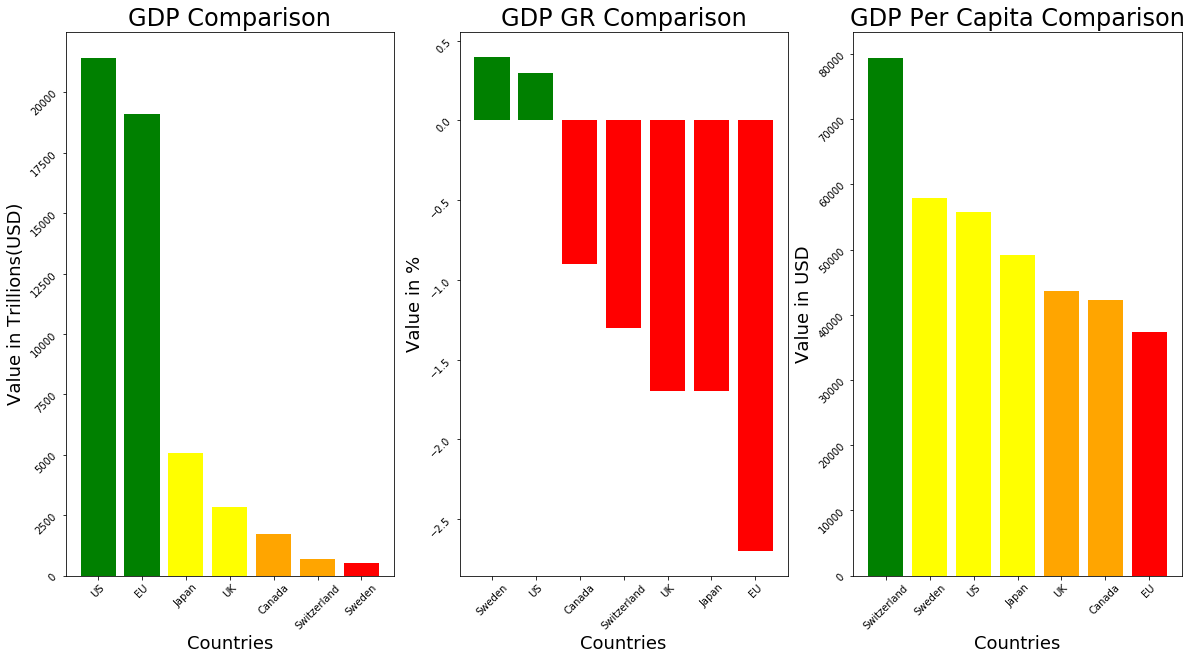

In [176]:
f, (a1,a2,a3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,10))


gdp = df['GDP'].sort_values(ascending = False)
gdp_gr = df['GDP Growth rate'].sort_values(ascending = False)
gdp_pc = df['GDP Per Capita'].sort_values(ascending = False)

a1.bar(gdp.index, gdp.values, color = ['green', 'green', 'yellow', 'yellow', 'orange', 'orange', 'red'])
a1.tick_params(labelrotation=45)
a1.set_title('GDP Comparison', fontsize = 24)
a1.set_xlabel('Countries', fontsize = 18)
a1.set_ylabel('Value in Trillions(USD)', fontsize = 18)

a2.bar(gdp_gr.index, gdp_gr.values, color = ['green', 'green', 'red', 'red', 'red', 'red', 'red'])
a2.tick_params(labelrotation=45)
a2.set_title('GDP GR Comparison', fontsize = 24)
a2.set_xlabel('Countries', fontsize = 18)
a2.set_ylabel('Value in %', fontsize = 18)

a3.bar(gdp_pc.index, gdp_pc.values, color = ['green', 'yellow', 'yellow', 'yellow', 'orange', 'orange', 'red'])
a3.tick_params(labelrotation=45)
a3.set_title('GDP Per Capita Comparison', fontsize = 24)
a3.set_xlabel('Countries', fontsize = 18)
a3.set_ylabel('Value in USD', fontsize = 18)

plt.show()
f.savefig('Macro_analisys.jpg')